In [2]:
import pandas as pd
import numpy as np
import networkx as nx
import statsmodels.api as sm
import seaborn as sns
%matplotlib inline


from sklearn import linear_model
from pathlib import Path
from matplotlib import pyplot as plt

In [3]:
data = Path().absolute()/'data'

## Importando dados de citação

In [4]:
desapro_df = pd.read_csv(data/'citacoes_desapropriacao.csv')

In [5]:
desapro_df.shape

(108, 21)

Removing Sumulas

In [6]:
desapro_df.query('~ @desapro_df.caso.str.contains("sumula")',
                 engine='python', inplace=True)

In [7]:
print(desapro_df.sort_values('citacoes_total', ascending=False)[['caso','citacoes_total']].head(8))

         caso  citacoes_total
4    adi 2332              14
3    adi 2260               8
58  re 543974               8
37  re 172816               7
78   re 82300               5
64  re 635336               5
47  re 247866               5
65   re 64559               5


In [8]:
desapro_df.groupby('citacoes_total').size().to_frame()

,0
citacoes_total,
2,64
3,15
4,6
5,4
7,1
8,2
14,1


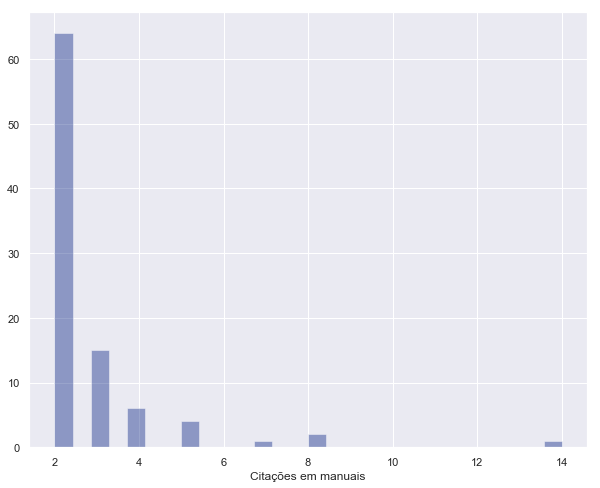

In [42]:
fig, ax = plt.subplots(figsize=(10,8))
sns.set_palette('dark')
sns.distplot(desapro_df.citacoes_total, kde=False, vertical=False, axlabel=u'Citações em manuais')
fig.savefig('graficos/histo_manuais_desapropriacao.png')

In [9]:
desapro_df.head()

,caso,"Alessandro Dantas Coutinho e Ronald Kruger Rodor, Manual de Direito Administrativo",Antonio Cecílio Moreira Pires Direito Administrativo 2a Ed,Aragão Curso de Direito Administrativo 2a Ed,Bandeira de Mello Curso de Direito Administrativo 31a Ed,Diógenes Gasparini Direito Administrativo 17a Ed,Fernanda Marinela Direito Administrativo 11a Ed,Hely Lopes Meirelles Direito Administrativo Brasileira 42a Ed,Irene Patrícia Nohara Direito Administrativo 8a Ed,José dos Santos Carvalho Filho 28a Ed,...,Marcio Pestana Direito Administrativo Brasileiro 4a Ed,Maria Sylvia Zanella di Pietro 31a Ed,Marçal Justen Filho Curso de Direito Administrativo 12a Ed,Moreira Neto Curso de Direito Administrativo 16a Ed,Odete Medauar Curso de Direito Administrativo 21a Ed,Odete Medauar Odete Medauar Curso de Direito Administrativo 11a Ed,Reinaldo Couto Curso de Direito Administrativo 2a Ed,Ricardo Alexandre e João de Deus Direito Administrativo 4a Ed,citado,citacoes_total
0,aco 2162,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,2
1,adi 1187,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,2
2,adi 2213,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,3
3,adi 2260,0,0,0,0,1,1,0,1,0,...,0,1,0,0,0,0,1,1,1,8
4,adi 2332,1,0,0,1,1,1,1,1,1,...,1,0,1,0,1,1,1,1,1,14


## Carregando Grafo

In [8]:
desapro_graph = nx.read_graphml(str(data.parent/'grafo_desapropriacao.graphml'))

### Gerando gráfico com a distribuição dos graus

Gráfico de In Degree

In [9]:
in_degree = pd.Series(dict(desapro_graph.in_degree), name='Número de Citações Recebidas').reset_index()

TypeError: cannot concatenate 'str' and 'int' objects

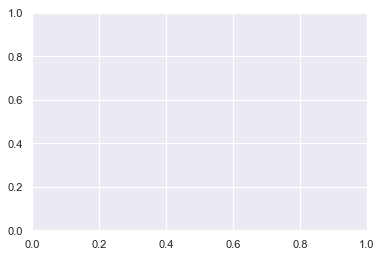

In [10]:
sns.set()

sns.distplot(in_degree)

In [10]:
in_d_dist = in_degree.groupby('Número de Citações Recebidas').index.nunique().reset_index()

in_d_dist.rename(columns={'index': 'Número de Casos'}, inplace=True)

In [11]:
in_d_dist.head()

,Número de Citações Recebidas,Número de Casos
0,0,3973
1,1,218
2,2,113
3,3,57
4,4,48


/home/joseluiz/anaconda2/lib/python2.7/site-packages/pandas/core/indexes/base.py:2037: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  return key in self._engine
/home/joseluiz/anaconda2/lib/python2.7/site-packages/pandas/core/indexes/base.py:2057: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  return key in self._engine
/home/joseluiz/anaconda2/lib/python2.7/site-packages/pandas/core/indexes/base.py:3078: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  return self._engine.get_loc(key)
/home/joseluiz/anaconda2/lib/python2.7/site-packages/pandas/core/indexes/base.py:3080: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  return self._engine.get_loc(self._maybe_cast_indexer(key))


UnicodeEncodeError: 'ascii' codec can't encode character u'\xfa' in position 1: ordinal not in range(128)

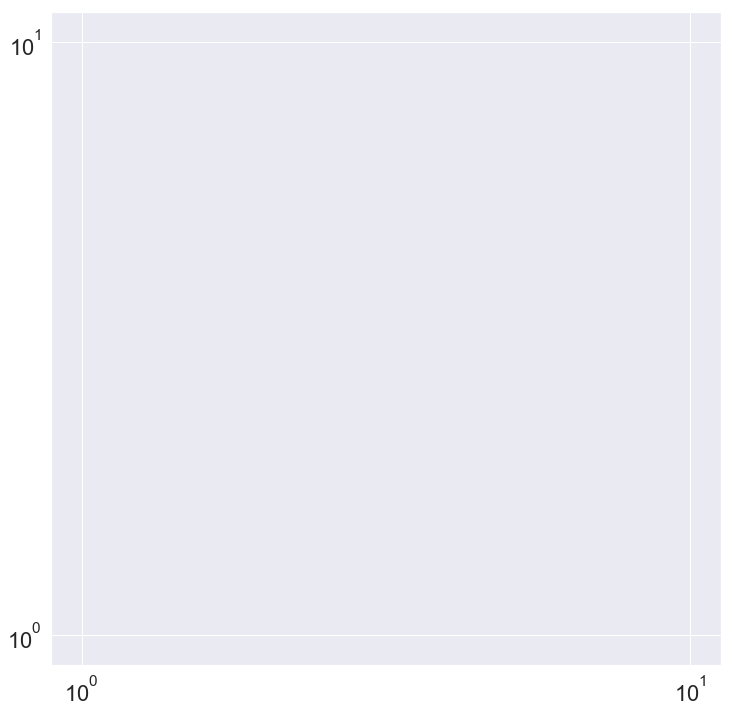

In [14]:
sns.set(rc={'figure.figsize':(12,12)}, font_scale=2)

fig, ax = plt.subplots(figsize=(12,12))

plt.xscale('log')
plt.yscale('log')

in_degree_graph = sns.scatterplot(x='Número de Citações Recebidas', y='Número de Casos', data=in_d_dist.drop(0), s=150,)

In [13]:
fig.savefig('graficos/in_desapropriacao.png')

ValueError: matplotlib display text must have all code points < 128 or use Unicode strings

Gráfico de Out Degree

In [ ]:
out_degree = pd.Series(dict(desapro_graph.out_degree), name='Número de Citações Realizadas').reset_index()

In [ ]:
out_d_dist = out_degree.groupby('Número de Citações Realizadas').index.nunique().reset_index()

out_d_dist.rename(columns={'index': 'Número de Casos'}, inplace=True)

In [ ]:
out_d_dist.head()

In [ ]:
sns.set(rc={'figure.figsize':(12,12)}, font_scale=2)

fig, ax = plt.subplots(figsize=(12,12))

plt.xscale('log')
plt.yscale('log')

in_degree_graph = sns.scatterplot(x='Número de Citações Realizadas', y='Número de Casos', data=out_d_dist.drop(0), s=150,)

In [ ]:
fig.savefig('graficos/out_desapropriacao.png')

### Removendo nós roxo - comunidade relativa ao RE 453740 que trata de juros para remuneração de servidores públicos

In [12]:
other_nodes = [n for n,v in desapro_graph.nodes(data=True) if v['Modularity Class'] != 1774]

In [13]:
len(other_nodes)

3903

In [14]:
graph = desapro_graph.subgraph(other_nodes)

### Calculando PageRank e HITS

In [15]:
pr_d = pd.Series(nx.algorithms.link_analysis.pagerank(graph),
                 name='page_rank').to_frame()

In [16]:
hub, auth = nx.algorithms.link_analysis.hits(graph)

In [17]:
hub_d = pd.Series(hub, name='hub_score').to_frame()

auth_d = pd.Series(auth, name='auth_score').to_frame()

Adicionando Modularidade

In [18]:
mod_d = pd.Series(nx.get_node_attributes(graph, 'Modularity Class'),
                  name='modularity').to_frame()

Obtendo número de citações

In [19]:
n_cit = pd.Series(nx.get_node_attributes(graph, 'In-Degree'),
                  name='n_citacoes').to_frame()

Gerando Dataframe com todas as informações

In [20]:
desaprop_info = mod_d.join(n_cit).join(pr_d).join(auth_d).join(hub_d)

In [21]:
desaprop_info.index = desaprop_info.index.str.lower()

Incluindo MARC In-degree

In [22]:
desaprop_info['marc'] = 1 + np.log2(desaprop_info['n_citacoes'])

/home/joseluiz/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log2
  """Entry point for launching an IPython kernel.


In [23]:
desaprop_info.head()

,modularity,n_citacoes,page_rank,auth_score,hub_score,marc
ac 1132,697,0,0.000155,0.000000e+00,9.775919e-07,-inf
ac 1176,436,1,0.000286,1.399016e-135,0.000000e+00,1.000000
ac 1516,736,0,0.000155,0.000000e+00,1.217640e-137,-inf
ac 1546,751,3,0.000418,1.350715e-05,1.094673e-08,2.584963
ac 1577,1560,0,0.000155,0.000000e+00,0.000000e+00,-inf


substituindo infinitos por 0

In [24]:
desaprop_info.replace(-np.inf, 0, inplace=True)

#### Gerando Quantis para cada coluna

In [25]:
for c in desaprop_info[['page_rank', 'auth_score', 'hub_score']].columns:
    desaprop_info[c + '_quantile'] = pd.qcut(desaprop_info[c], 1000, duplicates='drop', labels=False)/10

### Juntando informação de citação com as medidas de rede

In [26]:
desaprop_info.index.name = 'caso'
desaprop_info.reset_index(drop=False, inplace=True)

In [27]:
desaprop_info.shape

(3903, 10)

In [28]:
desapro_df = desapro_df.merge(desaprop_info, how='right')

In [29]:
desapro_df[['citado', 'page_rank']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3903 entries, 0 to 3902
Data columns (total 2 columns):
citado       22 non-null float64
page_rank    3903 non-null float64
dtypes: float64(2)
memory usage: 91.5 KB


In [30]:
desapro_df.fillna(0, inplace=True)

In [80]:
desapro_df.head()

,caso,"Alessandro Dantas Coutinho e Ronald Kruger Rodor, Manual de Direito Administrativo",Antonio Cecílio Moreira Pires Direito Administrativo 2a Ed,Aragão Curso de Direito Administrativo 2a Ed,Bandeira de Mello Curso de Direito Administrativo 31a Ed,Diógenes Gasparini Direito Administrativo 17a Ed,Fernanda Marinela Direito Administrativo 11a Ed,Hely Lopes Meirelles Direito Administrativo Brasileira 42a Ed,Irene Patrícia Nohara Direito Administrativo 8a Ed,José dos Santos Carvalho Filho 28a Ed,...,citacoes_total,modularity,n_citacoes,page_rank,auth_score,hub_score,marc,page_rank_quantile,auth_score_quantile,hub_score_quantile
0,aco 2162,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,564,3,0.000536,7.566777e-104,0.000000e+00,2.584963,8.7,0.9,0.0
1,adi 2213,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,3.0,764,13,0.001404,2.659220e-08,1.716093e-11,4.700440,12.6,7.0,3.5
2,adi 2260,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,8.0,184,3,0.000326,5.747924e-06,0.000000e+00,2.584963,5.7,11.1,0.0
3,adi 2332,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,14.0,663,116,0.012114,5.316776e-04,0.000000e+00,7.857981,14.4,14.7,0.0
4,adi 4357,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,4.0,751,6,0.000838,1.594614e-04,0.000000e+00,3.584963,10.9,14.2,0.0


## Gerando matriz de correlação 

In [73]:
des_cor = desapro_df[
    [
        'page_rank_quantile',
        'auth_score_quantile',
        'hub_score_quantile',
        'citado']].corr(method='pearson')

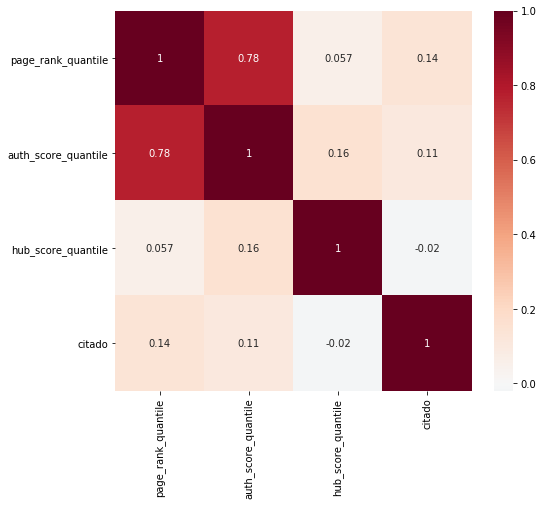

In [74]:
fig, ax = plt.subplots(figsize=(8,7))

h = sns.heatmap(des_cor, cmap='RdBu_r', center=0, annot=True)

fig.savefig('graficos/correlation_table', bbox_inches='tight')

## Testando Modelos

Linear Model

In [33]:
y_d1 = desapro_df.page_rank_quantile
y_d2 = desapro_df.auth_score_quantile

x_d = desapro_df.citacoes_total

x_d = sm.add_constant(x_d, False)

In [34]:
linmodel_d_pr = sm.OLS(y_d1, x_d, missing='drop').fit()
linmodel_d_pr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     page_rank_quantile   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     62.75
Date:                Mon, 21 Jan 2019   Prob (F-statistic):           3.03e-15
Time:                        15:27:03   Log-Likelihood:                -9833.5
No. Observations:                3903   AIC:                         1.967e+04
Df Residuals:                    3901   BIC:                         1.968e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
citacoes_total     1.1398      0.144      7.922      0.000       0.858       1.422
const              1.1155      0.048     23.142      0.000       1.021       1.210
==============================================================================
Omnibus:                     2244.057   Durbin-Watson:                   1.722
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            13727.332
Skew:                           2.843   Prob(JB):                         0.00
Kurtosis:                      10.216   Cond. No.                         2.99
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
linmodel_d_pr = sm.OLS(y_d2, x_d, missing='drop').fit()
linmodel_d_pr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     auth_score_quantile   R-squared:                       0.010
Model:                             OLS   Adj. R-squared:                  0.010
Method:                  Least Squares   F-statistic:                     39.75
Date:                 Mon, 21 Jan 2019   Prob (F-statistic):           3.20e-10
Time:                         15:27:03   Log-Likelihood:                -10424.
No. Observations:                 3903   AIC:                         2.085e+04
Df Residuals:                     3901   BIC:                         2.087e+04
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
citacoes_total     1.0556      0.167      6.305      0.000       0.727       1.384
const              1.2874      0.056     22.956      0.000       1.177       1.397
==============================================================================
Omnibus:                     2158.322   Durbin-Watson:                   1.861
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11945.503
Skew:                           2.756   Prob(JB):                         0.00
Kurtosis:                       9.563   Cond. No.                         2.99
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

/home/joseluiz/anaconda2/lib/python2.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


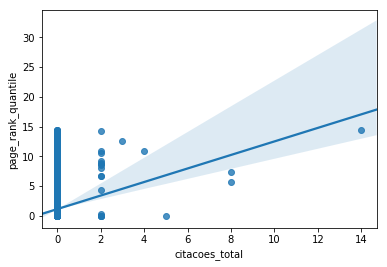

In [36]:
sns.regplot(x='citacoes_total', y='page_rank_quantile', data=desapro_df)

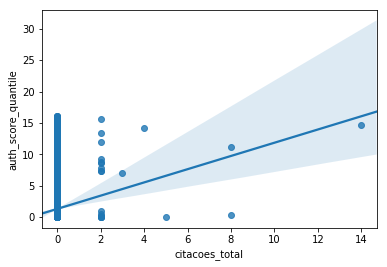

In [37]:
sns.regplot(x='citacoes_total', y='auth_score_quantile', data=desapro_df)

### Modelo Logístico

testando modelo com todas as varíavais

In [61]:
X = desapro_df[['page_rank_quantile', 'auth_score_quantile', 'hub_score_quantile', 'n_citacoes']]
X = sm.add_constant(X)

logit_model = sm.Logit(exog=X,
                       endog=desapro_df['citado'])

logit_result = logit_model.fit(disp=False)

In [62]:
logit_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 citado   No. Observations:                 3903
Model:                          Logit   Df Residuals:                     3898
Method:                           MLE   Df Model:                            4
Date:                Mon, 21 Jan 2019   Pseudo R-squ.:                  0.1555
Time:                        16:08:26   Log-Likelihood:                -114.74
converged:                       True   LL-Null:                       -135.86
                                        LLR p-value:                 1.483e-08
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -5.7789      0.340    -17.002      0.000      -6.445      -5.113
page_rank_quantile      0.2104      0.063      3.342      0.001       0.087       0.334
auth_score_quantile     0.0623      0.061      1.024      0.306      -0.057       0.182
hub_score_quantile     -0.0543      0.027     -2.050      0.040      -0.106      -0.002
n_citacoes              0.0019      0.008      0.228      0.820      -0.014       0.018
=======================================================================================
"""

Testando modelo sem número de citações

In [63]:
X = desapro_df[['page_rank_quantile', 'auth_score_quantile', 'hub_score_quantile']]
X = sm.add_constant(X)

logit_model = sm.Logit(exog=X,
                       endog=desapro_df['citado'])

logit_result = logit_model.fit(disp=False)

logit_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 citado   No. Observations:                 3903
Model:                          Logit   Df Residuals:                     3899
Method:                           MLE   Df Model:                            3
Date:                Mon, 21 Jan 2019   Pseudo R-squ.:                  0.1553
Time:                        16:08:27   Log-Likelihood:                -114.77
converged:                       True   LL-Null:                       -135.86
                                        LLR p-value:                 3.643e-09
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -5.7854      0.339    -17.045      0.000      -6.451      -5.120
page_rank_quantile      0.2128      0.062      3.444      0.001       0.092       0.334
auth_score_quantile     0.0646      0.060      1.085      0.278      -0.052       0.181
hub_score_quantile     -0.0546      0.026     -2.064      0.039      -0.107      -0.003
=======================================================================================
"""

Apenas Authority e Hub

In [64]:
X = desapro_df[['auth_score_quantile',
                'hub_score_quantile']]
X = sm.add_constant(X)

logit_model = sm.Logit(exog=X,
                       endog=desapro_df['citado'])

logit_result4 = logit_model.fit(disp=False)

logit_result4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 citado   No. Observations:                 3903
Model:                          Logit   Df Residuals:                     3900
Method:                           MLE   Df Model:                            2
Date:                Mon, 21 Jan 2019   Pseudo R-squ.:                  0.1165
Time:                        16:08:27   Log-Likelihood:                -120.03
converged:                       True   LL-Null:                       -135.86
                                        LLR p-value:                 1.335e-07
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -5.5445      0.307    -18.055      0.000      -6.146      -4.943
auth_score_quantile     0.2194      0.036      6.163      0.000       0.150       0.289
hub_score_quantile     -0.0611      0.025     -2.400      0.016      -0.111      -0.011
=======================================================================================
"""

In [76]:
# print(logit_result4.summary().as_latex())

Regressão PageRank e Hub

In [84]:
X = desapro_df[['page_rank_quantile',
                'hub_score_quantile']]
X = sm.add_constant(X)

logit_model = sm.Logit(exog=X,
                       endog=desapro_df['citado'])

logit_result5 = logit_model.fit(disp=False)

logit_result5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 citado   No. Observations:                 3903
Model:                          Logit   Df Residuals:                     3900
Method:                           MLE   Df Model:                            2
Date:                Mon, 21 Jan 2019   Pseudo R-squ.:                  0.1509
Time:                        16:55:06   Log-Likelihood:                -115.36
converged:                       True   LL-Null:                       -135.86
                                        LLR p-value:                 1.241e-09
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -5.7841      0.341    -16.976      0.000      -6.452      -5.116
page_rank_quantile     0.2629      0.038      6.847      0.000       0.188       0.338
hub_score_quantile    -0.0458      0.025     -1.803      0.071      -0.096       0.004
======================================================================================
"""

In [79]:
# print(logit_result5.summary().as_latex())

Comando para exportar tabela em latex

In [41]:
# print(logit_result.summary().as_latex())

## Testes

Correlação entre todas as variáveis calculadas

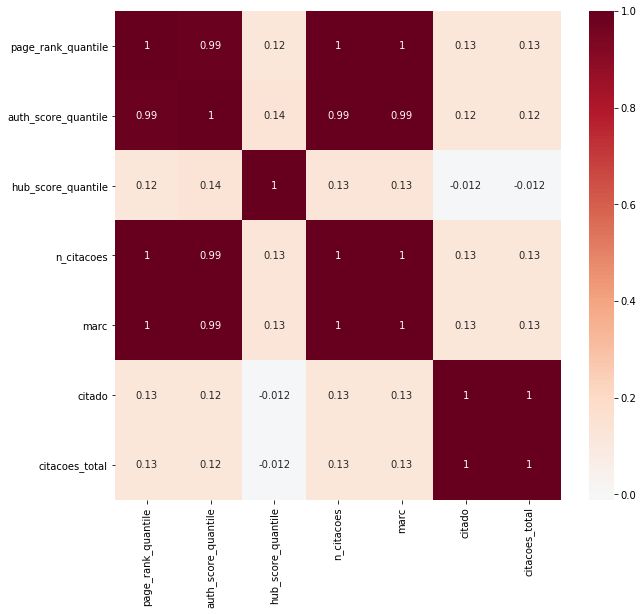

In [42]:
cor_geral = desapro_df[
    [
        'page_rank_quantile', 'auth_score_quantile',
        'hub_score_quantile', 'n_citacoes', 'marc',
        'citado', 'citacoes_total'
    ]
].corr(method='spearman')

fig, ax = plt.subplots(figsize=(10,9))

sns.heatmap(cor_geral, cmap='RdBu_r', center=0, annot=True)

Regressão com hub e MARC

In [45]:
X = desapro_df[['hub_score_quantile', 'marc']]
X = sm.add_constant(X)

logit_model = sm.Logit(exog=X,
                       endog=desapro_df['citado'])

logit_result3 = logit_model.fit(disp=False)

logit_result3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 citado   No. Observations:                 3903
Model:                          Logit   Df Residuals:                     3900
Method:                           MLE   Df Model:                            2
Date:                Mon, 21 Jan 2019   Pseudo R-squ.:                  0.1606
Time:                        15:27:05   Log-Likelihood:                -114.05
converged:                       True   LL-Null:                       -135.86
                                        LLR p-value:                 3.347e-10
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -5.7335      0.327    -17.518      0.000      -6.375      -5.092
hub_score_quantile    -0.0569      0.027     -2.101      0.036      -0.110      -0.004
marc                   0.6306      0.087      7.212      0.000       0.459       0.802
======================================================================================
"""

In [ ]:
# sns.regplot(x='page_rank_quantile', y='citado', data=desapro_df, fit_reg=True, logistic=True)

## Observações para alterar:

* Alta correlação (colinearidade?) entre page rank e authority. 
    * Não comprometeu modelo mas significância foi afetada
    * PR um pouco mais explicativo que authority